In [2]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline
# Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

## 0. Описание задачи

Предположим, что нужно узнать, будет ли завтра дождь в Австралии. Для этого необходимо проанализировать набор данных о погоде в Австралии, представляющие собой ежедневные наблюдения с одной метеостанции.

## 1. Загружаем данные

In [3]:
url = "https://raw.githubusercontent.com/vaalexeeva/ML-Alekseeva-3822M1FIii1/main/weatherAUS.csv"
data_raw = pd.read_csv(url)

Таблица содержит данные о более 140 тысяч погодных измерениях, произведенных в разных частях Австралии. Для каждого измерения указаны дата наблюдения (начиная с 2007 года и заканчивая 2017 годом), местоположение станции измерения, наименьшая и наибольшая температура, количество осадков, количество испарения, количество солнечных часов за сутки, а также направление, скорость порыва ветра, влажность, давление, доля открытого неба и температура в 9 утра и в 3 дня. Еще два признака, отвечающие за наличие дождя в текущем и следующем дне.

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одному измерению погоды) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [4]:
data_raw.shape

(145460, 23)

Посмотрим на первые 5 строк в таблице :

In [5]:
data_raw.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

Посмотрим на последние 5 строк :

In [6]:
data_raw.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[5 rows x 23 columns]

Посмотрим на названия столбцов :

In [7]:
data_raw.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Мы видим, что столбцы (признаки) имеют имена
- `Data` - дата наблюдения (объект даты)
- `Location` - общее название местоположения метеостанции
- `MinTemp` - минимальная температура в градусах по Цельсию
- `MaxTemp` - максимальная температура в градусах по Цельсию
- `Rainfall` - количество осадков в миллиметрах, зарегистрированных за день
- `Evaporation` - испарение кастрюли класса А в миллиметрах в течение 24 часов
- `Sunshine` - количество часов яркого солнечного света в день
- `WindGustDir` - направление самого сильного порыва ветра в течение 24 часов до полуночи
- `WindGustSpeed` - скорость (в километрах в час) самого сильного порыва ветра за 24 часа до полуночи
- `WindDir9am` - направление порыва ветра в 9 утра
- `WindDir3pm` - направление порыва ветра в 3 дня
- `WindSpeed9am` - скорость ветра (в километрах в час) в среднем превышала 10 минут до 9 утра
- `WindSpeed3pm` - скорость ветра (в километрах в час) в среднем составляла более 10 минут до 3 дня
- `Humidity9am` - относительная влажность (в процентах) в 9 утра
- `Humidity3pm` - относительная влажность (в процентах) в 3 дня
- `Pressure9am` - атмосферное давление (гПа) снижено до среднего уровня моря в 9 утра
- `Pressure3pm` - атмосферное давление (гПа) снижено до среднего уровня моря в 3 дня
- `Cloud9am` - доля неба, скрытая облаком в 9 утра
- `Cloud3pm` - доля неба, скрытая облаком в 3 дня
- `Temp9am` - температура воздуха в 9 утра
- `Temp3pm` - температура воздуха в 3 дня
- `RainToday` - бинарная переменная, показывающая идет дождь или нет в течение текущего дня
- `RainTomorrow` - бинарная переменная, показывающая идет дождь или нет в течение следующего дня

Признак `Date` - признак, показывающий даты и `Location` - признак, характеризующий местоположение получения показаний, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` и `RainTomorrow` - номинальные (категориальные), остальные признаки - количественные (числовые).

Требуется предсказать категориальный признак `RainTomorrow` по остальным признакам.

Посмотрим на типы признаков :


In [8]:
data_raw.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Приведем столбец `Date` к типу `Datetime`, `Location` к строковому типу.
А столбцы `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday`, `RainTomorrow` к категориальному типу.

In [9]:
data_raw['Date'] = pd.to_datetime(data_raw['Date'])
data_raw['Location'] = data_raw['Location'].astype('string')
data_raw['WindGustDir'] = data_raw['WindGustDir'].astype('category')
data_raw['WindDir9am'] = data_raw['WindDir9am'].astype('category')
data_raw['WindDir3pm'] = data_raw['WindDir3pm'].astype('category')
data_raw['RainToday'] = data_raw['RainToday'].astype('category')
data_raw['RainTomorrow'] = data_raw['RainTomorrow'].astype('category')

Убедимся, что все успешно :

In [10]:
data_raw.dtypes

Date             datetime64[ns]
Location                 string
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir            category
WindGustSpeed           float64
WindDir9am             category
WindDir3pm             category
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday              category
RainTomorrow           category
dtype: object

## 2. Визуализация и описательная статистика

Посмотрим на описание количественных признаков.
Выводится `count` (количество), `mean` (среднее), `std` (стандартное отклонение), `min` (минимальное), `25%` (квантиль 0.25), `50` (квантиль 0.5 (медиана)), `75%` (квантиль 0.75), `max` (максимальное).

In [11]:
data_raw.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

Посмотрим на краткое описание категориальных признаков. Выводится `count` (количество), `unique` (количество различных значений), `top` (наиболее часто встречаемое значение), `freq` (количество наиболее часто встречаемого значения)

In [12]:
data_raw.describe(include=['category'])

WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
count       135134     134894     141232    142199       142193
unique          16         16         16         2            2
top              W          N         SE        No           No
freq          9915      11758      10838    110319       110316

Сделаем также для строкового типа.

In [13]:
data_raw.describe(include=['string'])

Location
count     145460
unique        49
top     Canberra
freq        3436

Повторим также для типа `datetime`. Но дополнительно будем выводить самую раннюю дату (`first`) и самую позднюю дату (`last`).

In [14]:
data_raw.describe(include=['datetime64[ns]'])

C:\Users\vaale\AppData\Local\Temp\ipykernel_13428\2531648977.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_raw.describe(include=['datetime64[ns]'])


Date
count                145460
unique                 3436
top     2013-11-12 00:00:00
freq                     49
first   2007-11-01 00:00:00
last    2017-06-25 00:00:00

Построим все возможные диаграммы рассеивания для каждой пары количественных переменных.
Отрисовка всех точек требует много времени. Поэтому изобразим только $500$ случайных точек:

In [15]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=500, replace=False)

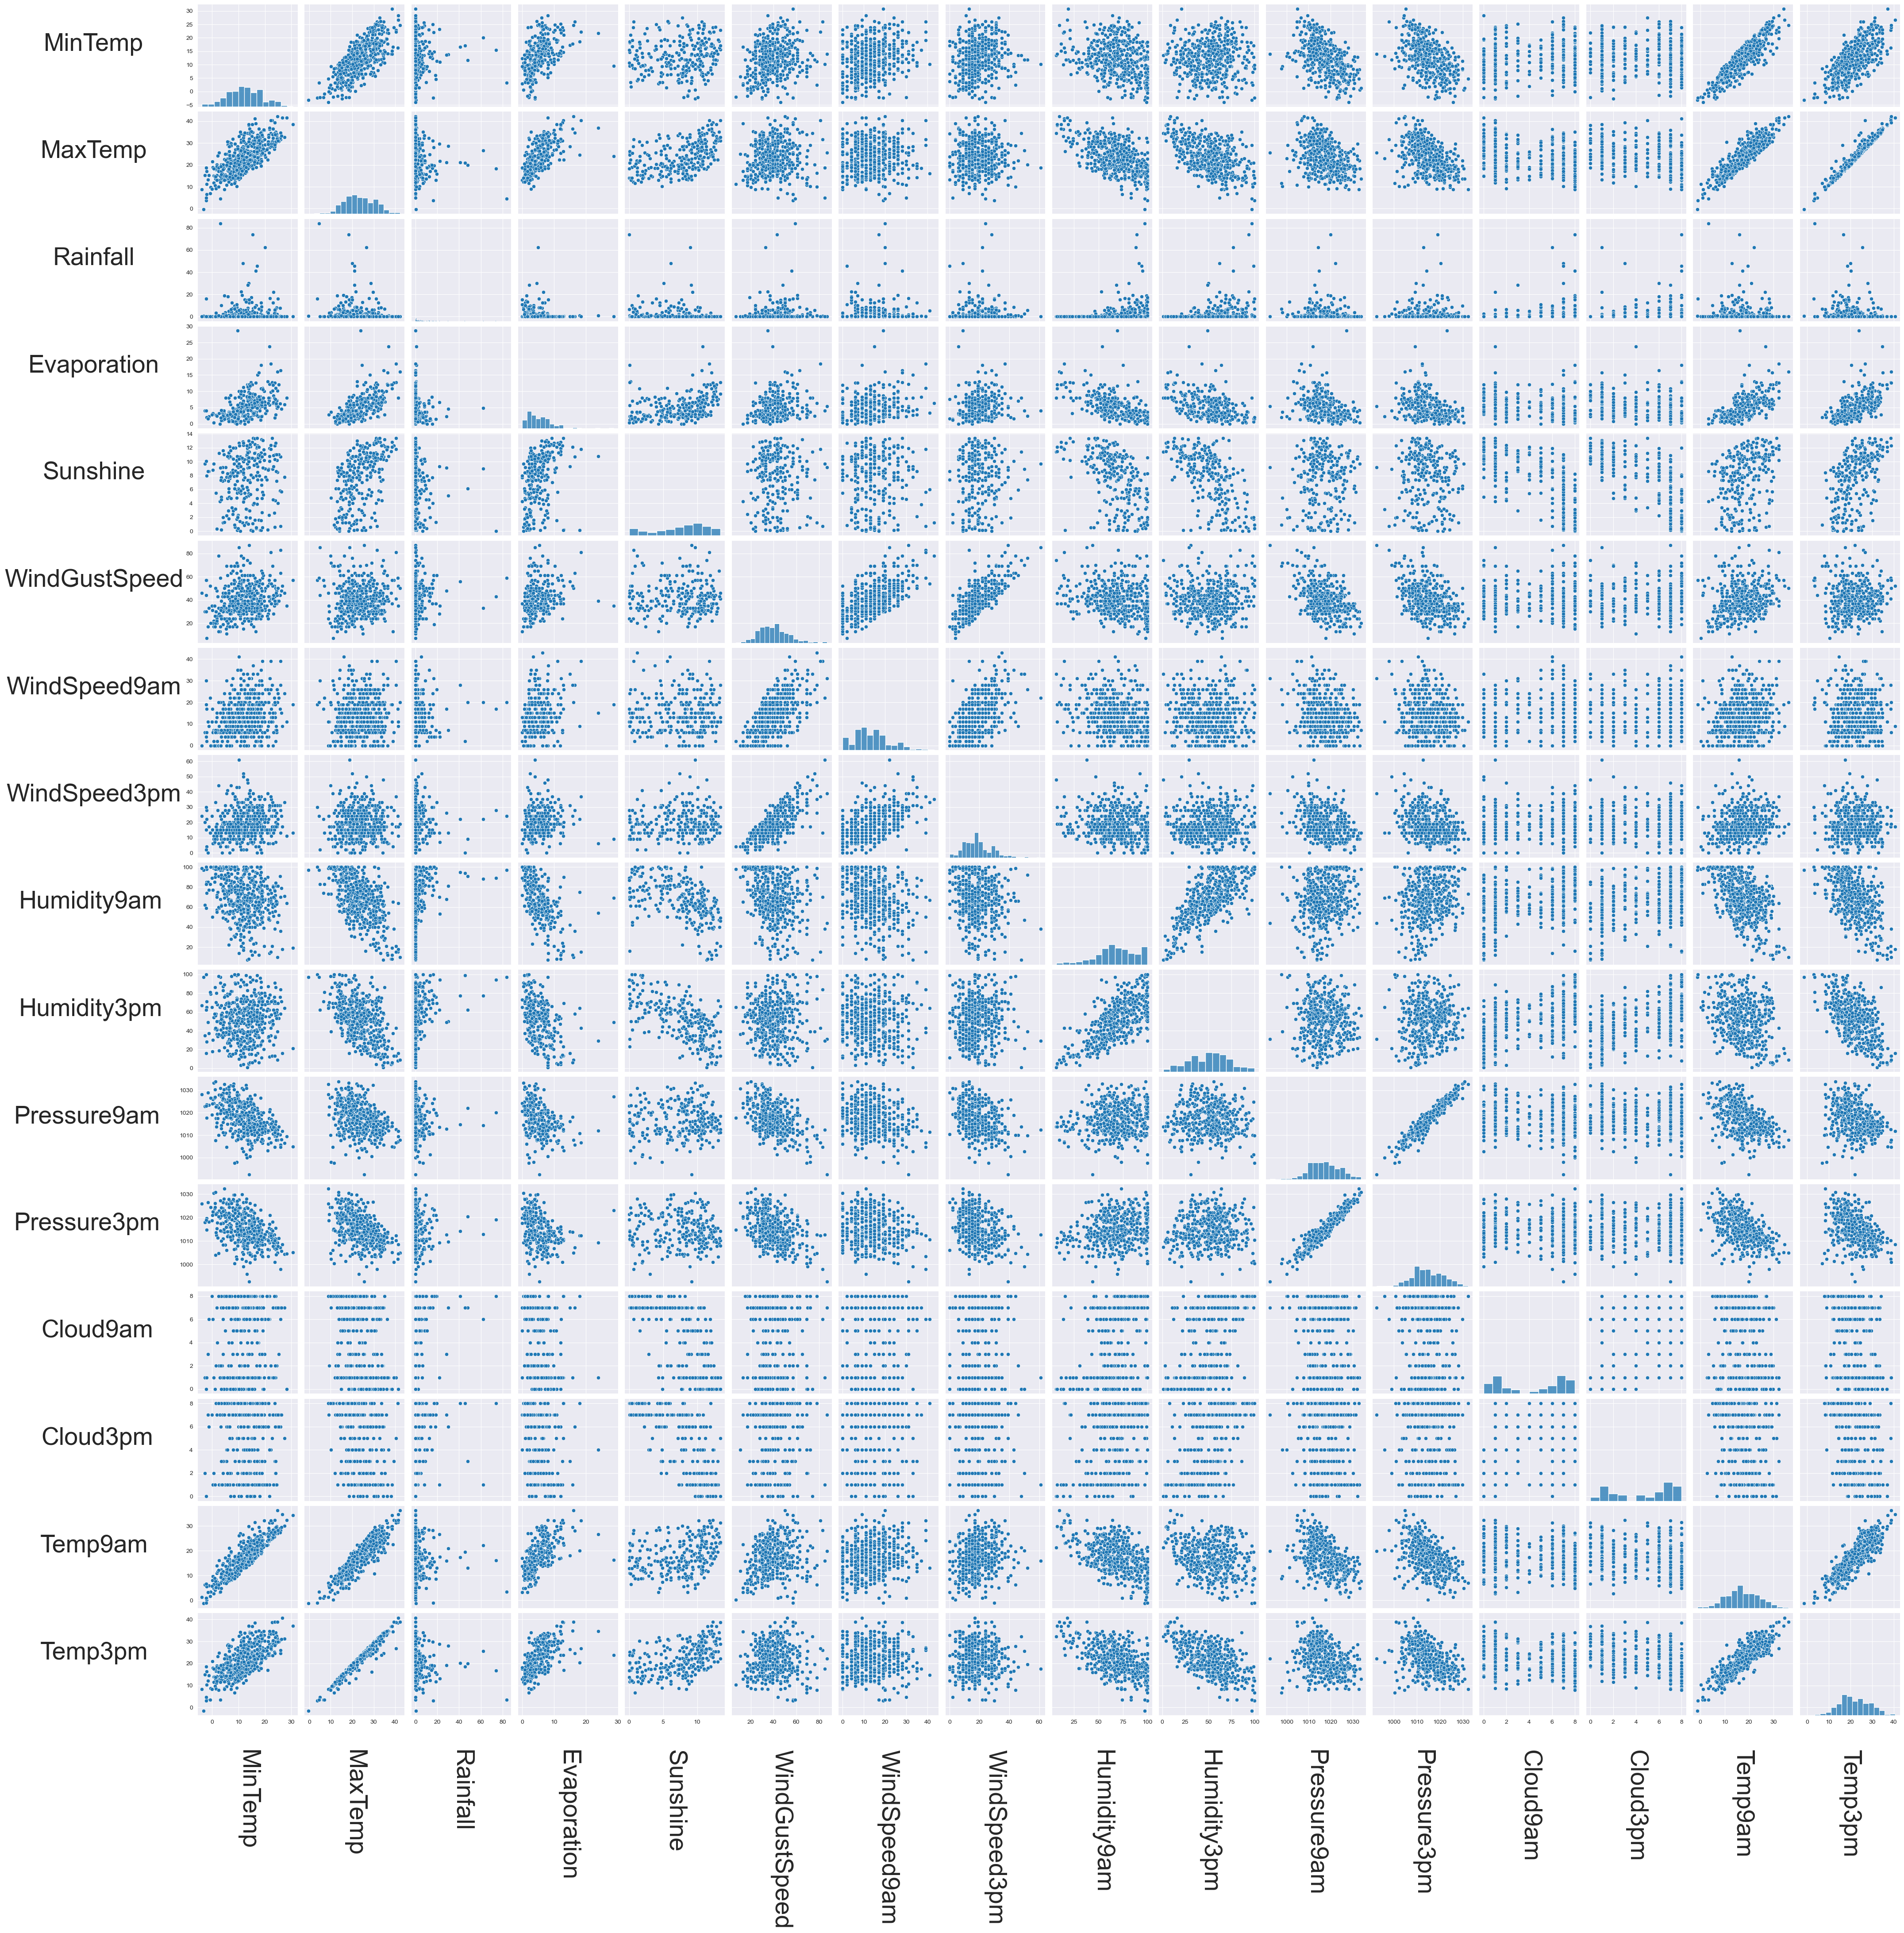

In [16]:
g = sns.pairplot(data_raw.iloc[random_subset], diag_kind='hist')
for ax in g.axes.flatten() :
    ax.set_xlabel(ax.get_xlabel(), rotation = -90, fontsize = 40, labelpad = 40)
    ax.set_ylabel(ax.get_ylabel(), rotation = 0, fontsize = 40, labelpad = 150)
pass

На диаграммах, в частности, наблюдается корреляция между `Temp9am` и `Temp3am`, `Pressure9am` и `Pressure3pm` и другие.

На диагонали расположены гистограммы распределения признаков.

Можно вычислить матрицу корреляции для количественных признаков :

In [17]:
corr_mat = data_raw.corr()
corr_mat

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021605 -0.277921  0.172403    -0.182618 -0.703930   
Temp9am        0.901821  0.887210  0.011192     0.545115  0.291188   
Temp3pm        0.708906  0.984503 -0.079657     0.572893  0.490501   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177415      0.175064      0.175173    -0.232899   
MaxTemp             0.067615      0.014450      0.050300    -0.504110   
Rainfall            0.133659      0.087338      0.057887     0.224405   
Evaporation         0.203021      0.193084      0.129400    -0.504092   
Sunshine           -0.034750      0.005499      0.053834    -0.490819   
WindGustSpeed       1.000000      0.605303      0.686307    -0.215070   
WindSpeed9am        0.605303      1.000000      0.519547    -0.270858   
WindSpeed3pm        0.686307      0.519547      1.000000    -0.145525   
Humidity9am        -0.215070     -0.270858     -0.145525     1.000000   
Humidity3pm        -0.026327     -0.031614      0.016432     0.666949   
Pressure9am        -0.458744     -0.228743     -0.296351     0.139442   
Pressure3pm        -0.413749     -0.175817     -0.255439     0.186858   
Cloud9am            0.071736      0.025112      0.053337     0.452297   
Cloud3pm            0.109168      0.054639      0.025396     0.357326   
Temp9am             0.150150      0.128545      0.163030    -0.471354   
Temp3pm             0.032748      0.004569      0.027778    -0.498399   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.006089    -0.450970    -0.461292  0.078754  0.021605   
MaxTemp          -0.508855    -0.332061    -0.427167 -0.289370 -0.277921   
Rainfall          0.255755    -0.168154    -0.126534  0.198528  0.172403   
Evaporation      -0.390243    -0.270362    -0.293581 -0.183793 -0.182618   
Sunshine         -0.629130     0.041970    -0.019719 -0.675323 -0.703930   
WindGustSpeed    -0.026327    -0.458744    -0.413749  0.071736  0.109168   
WindSpeed9am     -0.031614    -0.228743    -0.175817  0.025112  0.054639   
WindSpeed3pm      0.016432    -0.296351    -0.255439  0.053337  0.025396   
Humidity9am       0.666949     0.139442     0.186858  0.452297  0.357326   
Humidity3pm       1.000000    -0.027544     0.051997  0.517120  0.523120   
Pressure9am      -0.027544     1.000000     0.961326 -0.129796 -0.147861   
Pressure3pm       0.051997     0.961326     1.000000 -0.060772 -0.084778   
Cloud9am          0.517120    -0.129796    -0.060772  1.000000  0.603564   
Cloud3pm          0.523120    -0.147861    -0.084778  0.603564  1.000000   
Temp9am          -0.221019    -0.422556    -0.470187 -0.136959 -0.126659   
Temp3pm          -0.557841    -0.286770    -0.389548 -0.302060 -0.317420   

                Temp9am   Temp3pm  
MinTemp        0.901821  0.708906  
MaxTemp        0.887210  0.984503  
Rainfall       0.011192 -0.079657  
Evaporation    0.545115  0.572893  
Sunshine       0.291188  0.490501  
WindGustSpeed  0.150150  0.032748  
WindSpeed9am   0.128545  0.004569  
Wi

Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

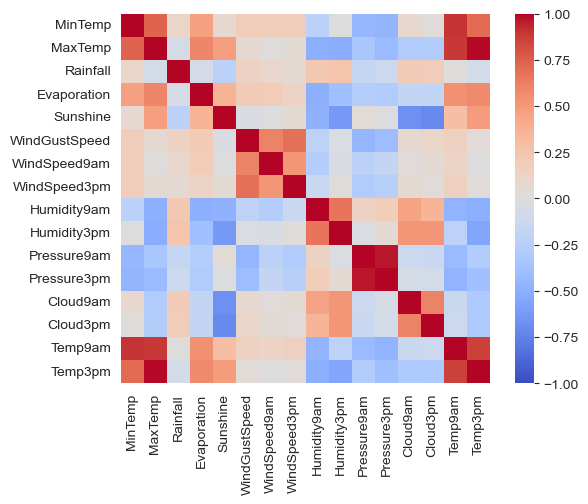

In [18]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm', vmin = -1, vmax = 1)
pass

Выведем коэффициенты корреляции, большие $0.6$ :


In [19]:
corr_mat.where(np.triu(corr_mat > 0.6, k=1)).stack().sort_values(ascending=False)

MaxTemp        Temp3pm         0.984503
Pressure9am    Pressure3pm     0.961326
MinTemp        Temp9am         0.901821
MaxTemp        Temp9am         0.887210
Temp9am        Temp3pm         0.860591
MinTemp        MaxTemp         0.736555
               Temp3pm         0.708906
WindGustSpeed  WindSpeed3pm    0.686307
Humidity9am    Humidity3pm     0.666949
WindGustSpeed  WindSpeed9am    0.605303
Cloud9am       Cloud3pm        0.603564
dtype: float64

Несбалансированность классов :

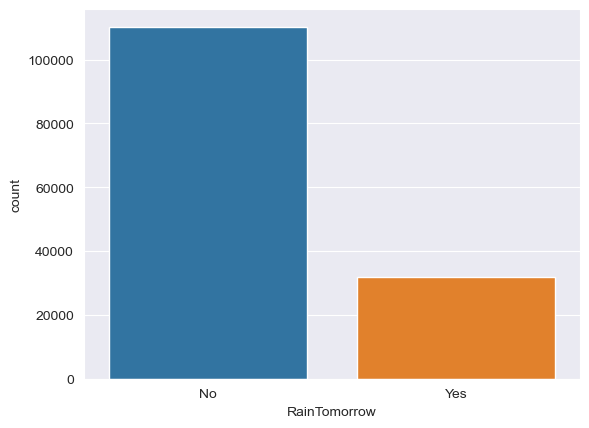

In [20]:
sns.countplot(x='RainTomorrow', data=data_raw)
pass

##  3. Заполнение пропущенных значений

Пропущенные значения в таблице представлены значениями `np.nan`.
Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [21]:
data_raw.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Заполняем пропущенные значения медианой (для количественных признаков) или модой (для номинальных признаков).

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [22]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)


C:\Users\vaale\AppData\Local\Temp\ipykernel_13428\252753737.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)
C:\Users\vaale\AppData\Local\Temp\ipykernel_13428\252753737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)


In [23]:
data_raw.isna().sum()


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:


In [24]:
data_raw['WindGustDir'].fillna(data_raw['WindGustDir'].mode().iloc[0], inplace=True)
data_raw['WindDir9am'].fillna(data_raw['WindDir9am'].mode().iloc[0], inplace=True)
data_raw['WindDir3pm'].fillna(data_raw['WindDir3pm'].mode().iloc[0], inplace=True)
data_raw['RainToday'].fillna(data_raw['RainToday'].mode().iloc[0], inplace=True)

Так как необходимо угадать, будет ли дождь завтра, то удалим все строки, в которых это значение пропущено :

In [25]:
data_raw = data_raw.drop(data_raw[data_raw.isna()['RainTomorrow'] == True].index)

Теперь убедимся, что пропущенных значений не осталось :

In [26]:
data_raw.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## 4. Обработка категориальных признаков

Заменим `Date` на количество дней, прошедших с начала первого измерения :

In [27]:
data_raw['Date'] = data_raw['Date'].apply(lambda x : x.value / (10**9 * 3600 * 24))
data_raw

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       14214.0   Albury     13.4     22.9       0.6          4.8       8.4   
1       14215.0   Albury      7.4     25.1       0.0          4.8       8.4   
2       14216.0   Albury     12.9     25.7       0.0          4.8       8.4   
3       14217.0   Albury      9.2     28.0       0.0          4.8       8.4   
4       14218.0   Albury     17.5     32.3       1.0          4.8       8.4   
...         ...      ...      ...      ...       ...          ...       ...   
145454  17337.0    Uluru      3.5     21.8       0.0          4.8       8.4   
145455  17338.0    Uluru      2.8     23.4       0.0          4.8       8.4   
145456  17339.0    Uluru      3.6     25.3       0.0          4.8       8.4   
145457  17340.0    Uluru      5.4     26.9       0.0          4.8       8.4   
145458  17341.0    Uluru      7.8     27.0       0.0          4.8       8.4   

       WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0                W           44.0          W  ...        71.0         22.0   
1              WNW           44.0        NNW  ...        44.0         25.0   
2              WSW           46.0          W  ...        38.0         30.0   
3               NE           24.0         SE  ...        45.0         16.0   
4                W           41.0        ENE  ...        82.0         33.0   
...            ...            ...        ...  ...         ...          ...   
145454           E           31.0        ESE  ...        59.0         27.0   
145455           E           31.0         SE  ...        51.0         24.0   
145456         NNW           22.0         SE  ...        56.0         21.0   
145457           N           37.0         SE  ...        53.0         24.0   
145458          SE           28.0        SSE  ...        51.0         24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       5.0     16.9     21.8   
1            1010.6       1007.8       5.0       5.0     17.2     24.3   
2            1007.6       1008.7       5.0       2.0     21.0     23.2   
3            1017.6       1012.8       5.0       5.0     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
145454       1024.7       1021.2       5.0       5.0      9.4     20.9   
145455       1024.6       1020.3       5.0       5.0     10.1     22.4   
145456       1023.5       1019.1       5.0       5.0     10.9     24.5   
145457       1021.0       1016.8       5.0       5.0     12.5     26.1   
145458       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RainTomorrow  
0              No            No  
1              No            No  
2              No            No  
3              No            No  
4              No            No  
...           ...           ...  
145454         No            No  
145455         No            No  
145456         No            No  
145457         No            No  
145458         No            No  

[142193 rows x 23 columns]

Закодируем категориальные признаки значениями от $0$ до $N-1$, где $N$ - количество различных значений данного признака.
Например, значения признака `RainTomorrow` заменятся на $0$ (если не будет дождя) и $1$ (если дождь будет).

In [28]:
data_raw['WindGustDir'] = pd.factorize(data_raw['WindGustDir'])[0]
data_raw['WindDir9am'] = pd.factorize(data_raw['WindDir9am'])[0]
data_raw['WindDir3pm'] = pd.factorize(data_raw['WindDir3pm'])[0]
data_raw['RainToday'] = pd.factorize(data_raw['RainToday'])[0]
data_raw['RainTomorrow'] = pd.factorize(data_raw['RainTomorrow'])[0]

Так как признак `Location` строкового типа, то исключим его из таблицы :

In [29]:
data = data_raw.drop('Location', axis = 1)
data

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       14214.0     13.4     22.9       0.6          4.8       8.4   
1       14215.0      7.4     25.1       0.0          4.8       8.4   
2       14216.0     12.9     25.7       0.0          4.8       8.4   
3       14217.0      9.2     28.0       0.0          4.8       8.4   
4       14218.0     17.5     32.3       1.0          4.8       8.4   
...         ...      ...      ...       ...          ...       ...   
145454  17337.0      3.5     21.8       0.0          4.8       8.4   
145455  17338.0      2.8     23.4       0.0          4.8       8.4   
145456  17339.0      3.6     25.3       0.0          4.8       8.4   
145457  17340.0      5.4     26.9       0.0          4.8       8.4   
145458  17341.0      7.8     27.0       0.0          4.8       8.4   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0                 0           44.0           0           0  ...         71.0   
1                 1           44.0           1           1  ...         44.0   
2                 2           46.0           0           1  ...         38.0   
3                 3           24.0           2           2  ...         45.0   
4                 0           41.0           3           3  ...         82.0   
...             ...            ...         ...         ...  ...          ...   
145454           14           31.0          11           2  ...         59.0   
145455           14           31.0           2           7  ...         51.0   
145456            4           22.0           2          12  ...         56.0   
145457            5           37.0           2           0  ...         53.0   
145458           12           28.0           5          12  ...         51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       5.0     16.9   
1              25.0       1010.6       1007.8       5.0       5.0     17.2   
2              30.0       1007.6       1008.7       5.0       2.0     21.0   
3              16.0       1017.6       1012.8       5.0       5.0     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       5.0       5.0      9.4   
145455         24.0       1024.6       1020.3       5.0       5.0     10.1   
145456         21.0       1023.5       1019.1       5.0       5.0     10.9   
145457         24.0       1021.0       1016.8       5.0       5.0     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8          0             0  
1          24.3          0             0  
2          23.2          0             0  
3          26.5          0             0  
4          29.7          0             0  
...         ...        ...           ...  
145454     20.9          0             0  
145455     22.4          0             0  
145456     24.5          0             0  
145457     26.1          0             0  
145458     26.0          0             0  

[142193 rows x 22 columns]

Заново посмотрим на типы всех признаков :

In [30]:
data.dtypes

Date             float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

Убедились, что остались только количественные признаки.

## 5. Произодим нормализацию

Так как в дальнейшем будет использоваться метод $KNN$ (метод $k$ ближайших соседей) со стандартной метрикой расстояния, следует нормализовать количественные признаки.

Наиболее часто используют один из двух следующих способов:
- *приведение к отрезку $[0,1]$* - это линейное преобразование, приводящее все значения к заданному отрезку;
- *стандартизация* - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

Произведем стандартизацию всех признаков :

In [31]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand

Date   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0      -1.715422  0.190084 -0.045764 -0.204919    -0.120303  0.146788   
1      -1.714338 -0.749039  0.263676 -0.276124    -0.120303  0.146788   
2      -1.713254  0.111824  0.348069 -0.276124    -0.120303  0.146788   
3      -1.712169 -0.467302  0.671574 -0.276124    -0.120303  0.146788   
4      -1.711085  0.831819  1.276389 -0.157450    -0.120303  0.146788   
...          ...       ...       ...       ...          ...       ...   
145454  1.670922 -1.359470 -0.200484 -0.276124    -0.120303  0.146788   
145455  1.672006 -1.469034  0.024563 -0.276124    -0.120303  0.146788   
145456  1.673090 -1.343818  0.291807 -0.276124    -0.120303  0.146788   
145457  1.674175 -1.062081  0.516854 -0.276124    -0.120303  0.146788   
145458  1.675259 -0.686431  0.530920 -0.276124    -0.120303  0.146788   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0         -1.442222       0.310478   -1.692963   -1.646164  ...     0.113126   
1         -1.237934       0.310478   -1.465870   -1.426832  ...    -1.312992   
2         -1.033646       0.462678   -1.692963   -1.426832  ...    -1.629907   
3         -0.829358      -1.211519   -1.238778   -1.207500  ...    -1.260173   
4         -1.442222       0.082178   -1.011686   -0.988169  ...     0.694137   
...             ...            ...         ...         ...  ...          ...   
145454     1.417810      -0.678820    0.805053   -1.207500  ...    -0.520704   
145455     1.417810      -0.678820   -1.238778   -0.110842  ...    -0.943258   
145456    -0.625070      -1.363718   -1.238778    0.985816  ...    -0.679162   
145457    -0.420782      -0.222221   -1.238778   -1.646164  ...    -0.837619   
145458     1.009234      -0.907119   -0.557501    0.985816  ...    -0.943258   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0         -1.436558    -1.474661    -1.220101  1.460292  0.140338 -0.013238   
1         -1.290447    -1.044794    -1.115339  0.152737  0.140338  0.033114   
2         -1.046927    -1.489484    -0.980645  0.152737 -1.275589  0.620240   
3         -1.728782    -0.007183    -0.367038  0.152737  0.140338  0.172170   
4         -0.900815    -1.015148    -1.384727  1.024440  1.556265  0.125818   
...             ...          ...          ...       ...       ...       ...   
145454    -1.193039     1.045251     0.890106  0.152737  0.140338 -1.172039   
145455    -1.339150     1.030428     0.755412  0.152737  0.140338 -1.063885   
145456    -1.485262     0.867374     0.575820  0.152737  0.140338 -0.940279   
145457    -1.339150     0.496799     0.231602  0.152737  0.140338 -0.693068   
145458    -1.339150     0.259631     0.186704 -0.718967 -1.275589 -0.291351   

         Temp3pm  RainToday  RainTomorrow  
0       0.018050   -0.53296     -0.537549  
1       0.381885   -0.53296     -0.537549  
2       0.221797   -0.53296     -0.537549  
3       0.702060   -0.53296     -0.537549  
4       1.167769   -0.53296     -0.537549  
...          ...        ...           ...  
145454 -0.112931   -0.53296     -0.537549  
145455  0.105370   -0.53296     -0.537549  
145456  0.410992   -0.53296     -0.537549  
145457  0.643846   -0.53296     -0.537549  
145458  0.629293   -0.53296     -0.537549  

[142193 rows x 22 columns]

In [33]:
data_stand.describe()

Date       MinTemp       MaxTemp      Rainfall   Evaporation  \
count  1.421930e+05  1.421930e+05  1.421930e+05  1.421930e+05  1.421930e+05   
mean  -6.567535e-16  2.569612e-14 -1.810403e-14 -2.880211e-14 -1.051970e-12   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.144815e+00 -3.237717e+00 -3.941895e+00 -2.761239e-01 -1.627177e+00   
25%   -8.848301e-01 -7.177353e-01 -7.490368e-01 -2.761239e-01 -3.714486e-01   
50%    6.070041e-02 -2.904469e-02 -8.796041e-02 -2.761239e-01 -1.203029e-01   
75%    8.696061e-01  7.222541e-01  6.997051e-01 -2.049193e-01  6.805643e-02   
max    1.676343e+00  3.398756e+00  3.498731e+00  4.375203e+01  4.389299e+01   

           Sunshine   WindGustDir  WindGustSpeed    WindDir9am    WindDir3pm  \
count  1.421930e+05  1.421930e+05   1.421930e+05  1.421930e+05  1.421930e+05   
mean  -1.080426e-12  2.921428e-14   1.991174e-15 -1.744088e-15  3.629391e-14   
std    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.894272e+00 -1.442222e+00  -2.581316e+00 -1.692963e+00 -1.646164e+00   
25%    7.438166e-02 -1.033646e+00  -6.788199e-01 -7.845932e-01 -7.688370e-01   
50%    1.467878e-01 -1.220617e-02  -7.002119e-02  1.237762e-01  1.084897e-01   
75%    2.553971e-01  8.049460e-01   4.626777e-01  8.050533e-01  7.664847e-01   
max    2.355176e+00  1.622098e+00   7.235564e+00  1.713423e+00  1.643811e+00   

       ...   Humidity9am   Humidity3pm   Pressure9am   Pressure3pm  \
count  ...  1.421930e+05  1.421930e+05  1.421930e+05  1.421930e+05   
mean   ...  2.093354e-15 -2.782122e-15  1.492662e-11 -8.956525e-12   
std    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    ... -3.637036e+00 -2.508045e+00 -5.506521e+00 -5.709902e+00   
25%    ... -6.263424e-01 -7.059995e-01 -6.149267e-01 -6.364265e-01   
50%    ...  6.030711e-02  2.455936e-02 -7.183260e-03 -7.854268e-03   
75%    ...  7.469566e-01  6.577104e-01  6.153832e-01  6.207179e-01   
max    ...  1.644883e+00  2.362348e+00  3.461401e+00  3.643851e+00   

           Cloud9am      Cloud3pm       Temp9am       Temp3pm     RainToday  \
count  1.421930e+05  1.421930e+05  1.421930e+05  1.421930e+05  1.421930e+05   
mean  -2.727375e-15  2.541623e-14  1.631530e-14 -1.015192e-13  2.273340e-14   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.026523e+00 -2.219540e+00 -3.736853e+00 -3.940477e+00 -5.329604e-01   
25%   -7.189673e-01 -3.316373e-01 -7.239696e-01 -7.241742e-01 -5.329604e-01   
50%    1.527365e-01  1.403383e-01 -4.413962e-02 -8.382429e-02 -5.329604e-01   
75%    5.885885e-01  6.123140e-01  6.974931e-01  6.729529e-01 -5.329604e-01   
max    1.896144e+00  2.028241e+00  3.586771e+00  3.641848e+00  1.876299e+00   

       RainTomorrow  
count  1.421930e+05  
mean   2.925316e-15  
std    1.000000e+00  
min   -5.375489e-01  
25%   -5.375489e-01  
50%   -5.375489e-01  
75%   -5.375489e-01  
max    1.860283e+00  

[8 rows x 22 columns]

Среднее (mean) для всех признаков примерно 0, а стандартное отклонение (std) равно 1. Мы произвели стандартизацию.

## 6. Разбиение данных на обучающую и тестовую выборку

Для предсказания цены квартиры будем использовать все входные признаки, кроме `Locaion`.

In [34]:
data_stand.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Угадываем мы столбец `RainTomorrow`, поэтому поместим его в переменную $y$, а все остальное - в $X$.

In [35]:
X = data_stand.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']

In [36]:
X

Date   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0      -1.715422  0.190084 -0.045764 -0.204919    -0.120303  0.146788   
1      -1.714338 -0.749039  0.263676 -0.276124    -0.120303  0.146788   
2      -1.713254  0.111824  0.348069 -0.276124    -0.120303  0.146788   
3      -1.712169 -0.467302  0.671574 -0.276124    -0.120303  0.146788   
4      -1.711085  0.831819  1.276389 -0.157450    -0.120303  0.146788   
...          ...       ...       ...       ...          ...       ...   
145454  1.670922 -1.359470 -0.200484 -0.276124    -0.120303  0.146788   
145455  1.672006 -1.469034  0.024563 -0.276124    -0.120303  0.146788   
145456  1.673090 -1.343818  0.291807 -0.276124    -0.120303  0.146788   
145457  1.674175 -1.062081  0.516854 -0.276124    -0.120303  0.146788   
145458  1.675259 -0.686431  0.530920 -0.276124    -0.120303  0.146788   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  \
0         -1.442222       0.310478   -1.692963   -1.646164  ...      0.614069   
1         -1.237934       0.310478   -1.465870   -1.426832  ...      0.384756   
2         -1.033646       0.462678   -1.692963   -1.426832  ...      0.843383   
3         -0.829358      -1.211519   -1.238778   -1.207500  ...     -1.105781   
4         -1.442222       0.082178   -1.011686   -0.988169  ...      0.155442   
...             ...            ...         ...         ...  ...           ...   
145454     1.417810      -0.678820    0.805053   -1.207500  ...     -0.647154   
145455     1.417810      -0.678820   -1.238778   -0.110842  ...     -0.876468   
145456    -0.625070      -1.363718   -1.238778    0.985816  ...     -1.105781   
145457    -0.420782      -0.222221   -1.238778   -1.646164  ...     -1.105781   
145458     1.009234      -0.907119   -0.557501    0.985816  ...     -1.335095   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          0.113126    -1.436558    -1.474661    -1.220101  1.460292   
1         -1.312992    -1.290447    -1.044794    -1.115339  0.152737   
2         -1.629907    -1.046927    -1.489484    -0.980645  0.152737   
3         -1.260173    -1.728782    -0.007183    -0.367038  0.152737   
4          0.694137    -0.900815    -1.015148    -1.384727  1.024440   
...             ...          ...          ...          ...       ...   
145454    -0.520704    -1.193039     1.045251     0.890106  0.152737   
145455    -0.943258    -1.339150     1.030428     0.755412  0.152737   
145456    -0.679162    -1.485262     0.867374     0.575820  0.152737   
145457    -0.837619    -1.339150     0.496799     0.231602  0.152737   
145458    -0.943258    -1.339150     0.259631     0.186704 -0.718967   

        Cloud3pm   Temp9am   Temp3pm  RainToday  
0       0.140338 -0.013238  0.018050   -0.53296  
1       0.140338  0.033114  0.381885   -0.53296  
2      -1.275589  0.620240  0.221797   -0.53296  
3       0.140338  0.172170  0.702060   -0.53296  
4       1.556265  0.125818  1.167769   -0.53296  
...          ...       ...       ...        ...  
145454  0.140338 -1.172039 -0.112931   -0.53296  
145455  0.140338 -1.063885  0.105370   -0.53296  
145456  0.140338 -0.940279  0.410992   -0.53296  
145457  0.140338 -0.693068  0.643846   -0.53296  
145458 -1.275589 -0.291351  0.629293   -0.53296  

[142193 rows x 21 columns]

In [37]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 142193, dtype: int64

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(f'Размер обучающей выборки = {N_train}\nРазмер тестовой выборки  = {N_test}')

Размер обучающей выборки = 106644
Размер тестовой выборки  = 35549


## 7 - 8. Классификатор $k$ ближайших соседей и вычисление ошибок на выборках

Обучим метод $KNN$ для $k$ от 1 до 21 с шагом 2. Для каждого значения $k$ будем сохранять значение коэффициентов детерминации на обучающей и тестовой выборках.

In [44]:
from sklearn.neighbors import KNeighborsClassifier as KNN
test_scores = []
train_scores = []
for current_k in range(1, 22, 2) :
    print(f'Current_k = {current_k}')
    model = KNN(n_neighbors = current_k)
    model.fit(X_train, y_train)
    test_scores.append(model.score(X_test, y_test))
    train_scores.append(model.score(X_train, y_train))

Current_k = 1
Current_k = 3
Current_k = 5
Current_k = 7
Current_k = 9
Current_k = 11
Current_k = 13
Current_k = 15
Current_k = 17
Current_k = 19
Current_k = 21


Построим зависимость полученных значений от $k$ :

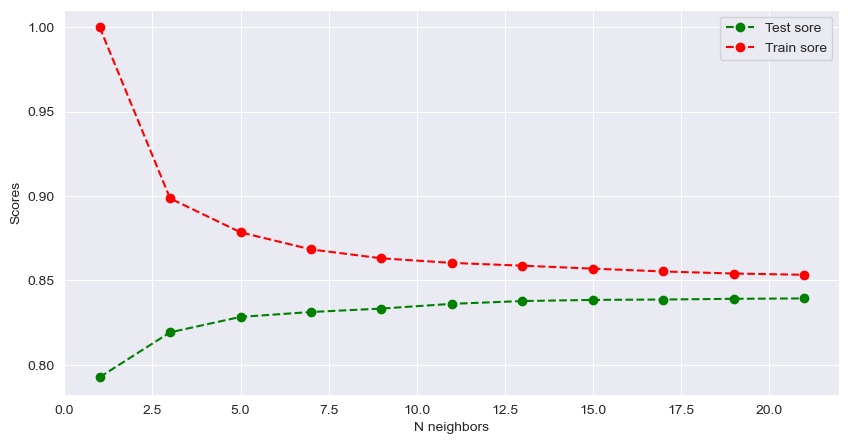

In [45]:
fig, ax = plt.subplots(1, 1, figsize = [10, 5])
ax.plot([i for i in range(1, 22, 2)], test_scores, 'go--', label = "Test sore")
ax.plot([i for i in range(1, 22, 2)], train_scores, 'ro--', label = "Train sore")
ax.set_xlabel("N neighbors")
ax.set_ylabel("Scores")
plt.legend()
plt.show()

Из полученного графика видно, что для того, чтобы получить стабильный результат на обучающей и тестовой выборке стоит брать число соседей равное 15 и более.
Выведем результаты для k = 15 :

In [46]:
print(f'Значение коэффициентов детерминации при k = 15 :')
print(f'На обучающей выборке = {train_scores[7]}\nНа тестовой выборке  = {test_scores[7]}')

Значение коэффициентов детерминации при k = 15 :
На обучающей выборке = 0.857028993661153
На тестовой выборке  = 0.8385045992854933


 ## 9. Выводы

Мы убедились, что с помощью метода KNN (метода k ближайших соседей) можно предсказать, будет ли завтра дождь в Австралии с достаточно хорошей точностью (около 85% на обучающей выборке и 84% на тестовой выборке).